# Assignment #8

Name:

    Angel Manuel Perez

# Chapter 09 (page  398): 5, 7, 8

In [21]:
import ISLP as isl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm, metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.datasets import make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# 9.5
## We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

### (a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:


In [2]:
# Set random seed for reproducibility
np.random.seed(123)
# Number of observations
n = 500

# Generate data
x1 = np.random.uniform(size=n) - 0.5
x2 = np.random.uniform(size=n) - 0.5
y = (x1**2 - x2**2) > 0

train = np.random.random(len(y)) > 0.5


### (b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the y- axis.


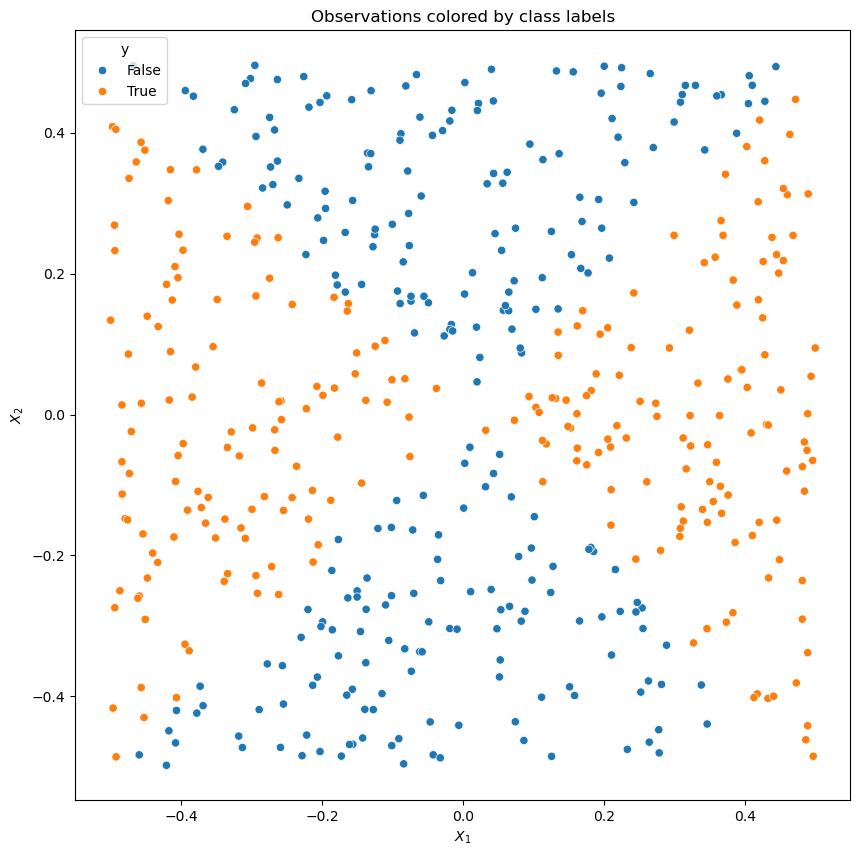

In [3]:
# Plot data
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=data)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Observations colored by class labels')
plt.show()

### (c) Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.


In [4]:
# Reshape the features to make them suitable for scikit-learn
X = np.column_stack((x1, x2))

# Initialize and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)


LogisticRegression()

### (d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.


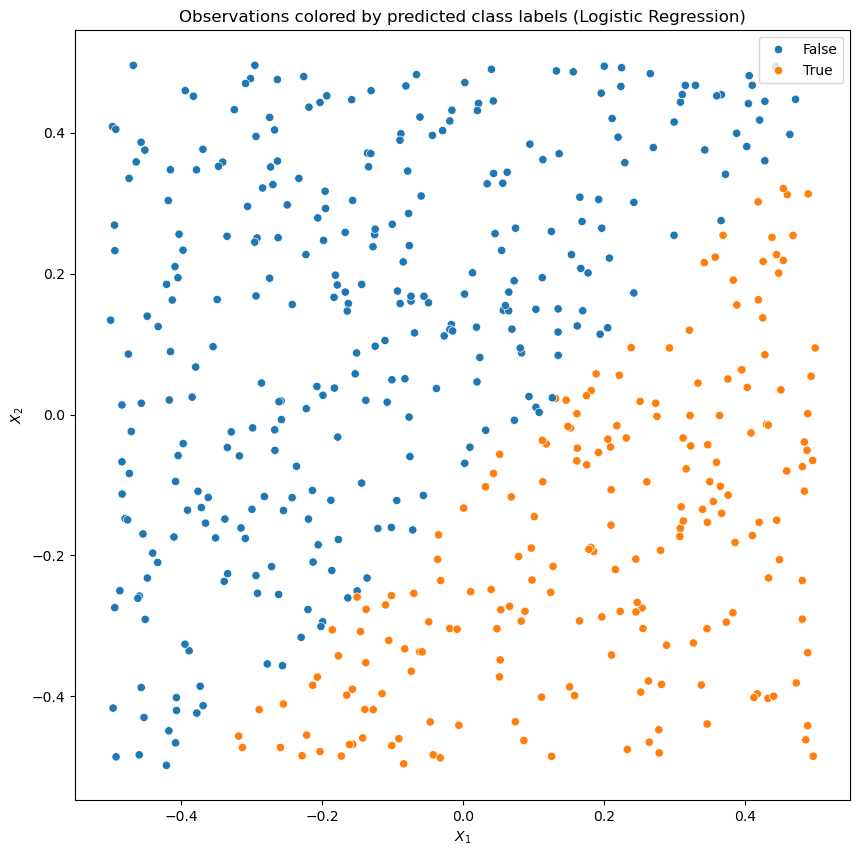

Training accuracy: 0.534


In [5]:
# Predict class labels
y_pred = log_reg.predict(X)

# Plot the observations colored by predicted class labels
plt.figure(figsize=(10, 10))
sns.scatterplot(x=x1, y=x2, hue=y_pred)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Observations colored by predicted class labels (Logistic Regression)')
plt.show()

# Evaluate training accuracy
training_accuracy = log_reg.score(X, y)
print(f'Training accuracy: {training_accuracy}')

### (e) Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X_{12}$, $X_1 \times X_2$, $log(X_2)$, and so forth).


In [6]:
# Generate non-linear features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit logistic regression model with non-linear features
model_non_linear = LogisticRegression()
model_non_linear.fit(X_poly, data['y'])


LogisticRegression()

In [7]:
# Define non-linear transformations of features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Define the target variable y
y = data['y'].values  # Assuming 'y' represents the class labels in the DataFrame 'data'

# Initialize a list to store cross-validated accuracies for each model
accuracies = []

# Train logistic regression models with different non-linear transformations
for feature_set in X_poly.T:  # Iterate over each feature (column) in X_poly
    # Reshape feature_set to match the expected shape for LogisticRegression
    feature_set = feature_set.reshape(-1, 1)
    
    # Initialize and fit logistic regression model
    model = LogisticRegression()
    model.fit(feature_set, y)
    
    # Evaluate model using cross-validation
    cv_scores = cross_val_score(model, feature_set, y, cv=5)
    mean_cv_score = cv_scores.mean()
    accuracies.append(mean_cv_score)

# Print cross-validated accuracies for each model
for i, acc in enumerate(accuracies):
    print(f'Model {i+1}: Cross-validated accuracy = {acc:.4f}')


Model 1: Cross-validated accuracy = 0.6080
Model 2: Cross-validated accuracy = 0.4260
Model 3: Cross-validated accuracy = 0.7500
Model 4: Cross-validated accuracy = 0.5060
Model 5: Cross-validated accuracy = 0.7480


### (f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)–(e) until you come up with an example in which the predicted class labels are obviously non-linear.


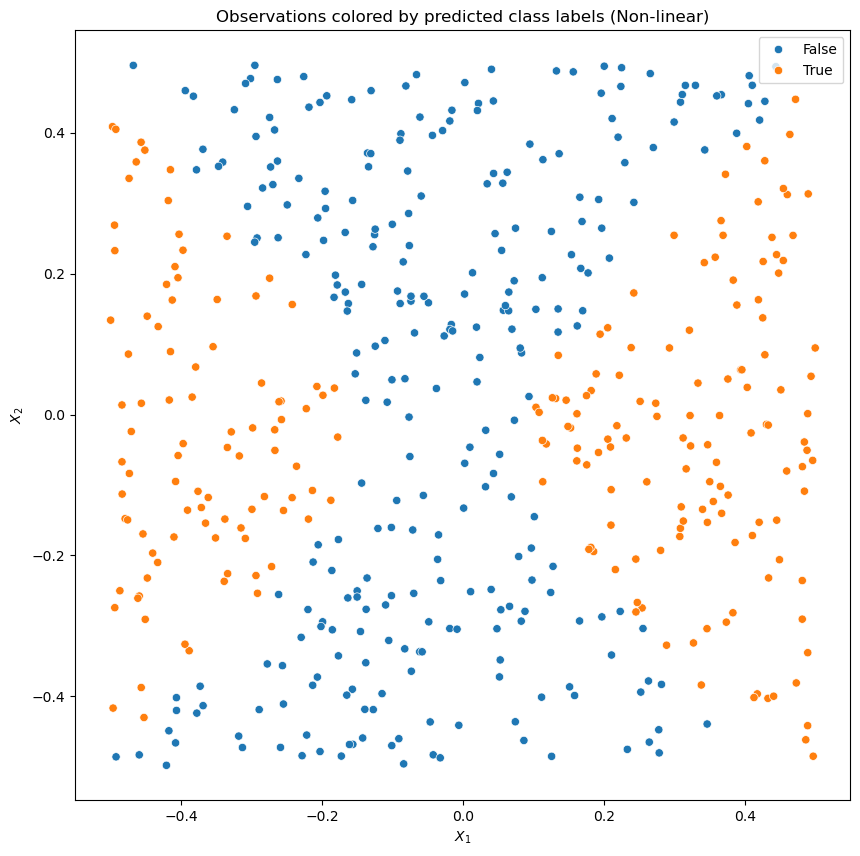

Training accuracy (non-linear): 0.918


In [8]:
# Predict class labels using the model with non-linear features
y_pred_non_linear = model_non_linear.predict(X_poly)

# Plot the observations colored by predicted class labels (non-linear)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue=y_pred_non_linear, data=data)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Observations colored by predicted class labels (Non-linear)')
plt.show()

# Evaluate training accuracy for the non-linear model
training_accuracy_non_linear = model_non_linear.score(X_poly, data['y'])
print(f'Training accuracy (non-linear): {training_accuracy_non_linear}')


### (g) Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

 

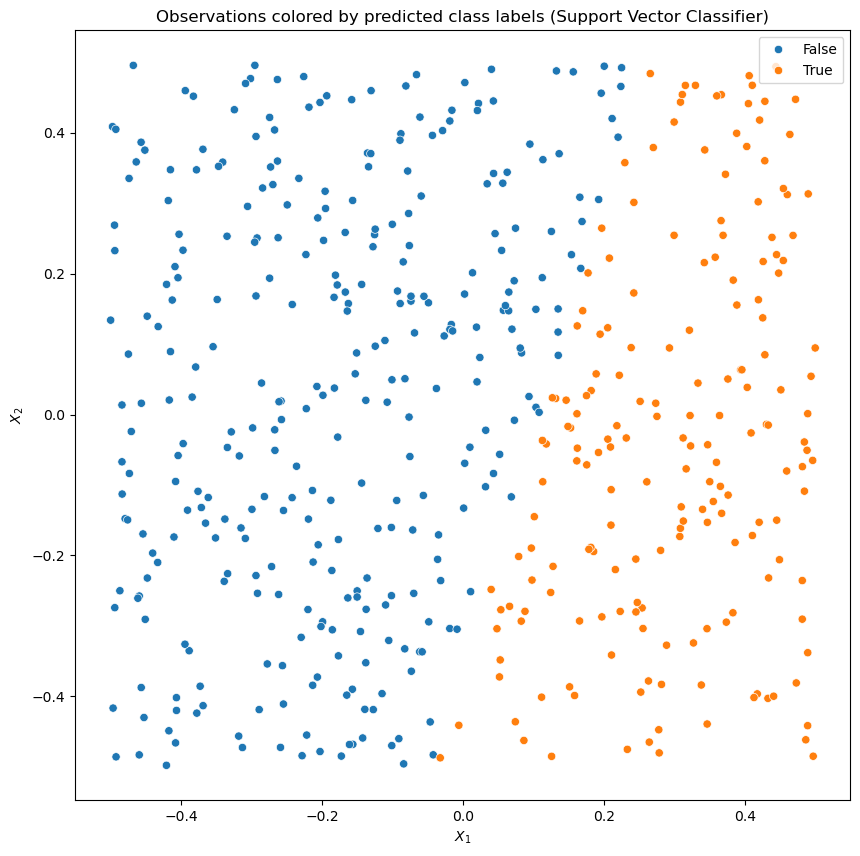

Training accuracy (SVM): 0.62


In [9]:
# Define feature matrix X and target vector y
X = data[['x1', 'x2']].values
y = data['y'].values

# Fit support vector classifier with linear kernel
svm_model = SVC(kernel='linear', gamma=1, C=1, random_state=0, probability=True)
svm_model.fit(X, y)

# Predict class labels for training observations
y_pred_svm = svm_model.predict(X)

# Plot the observations colored by predicted class labels
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue=y_pred_svm, data=data)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Observations colored by predicted class labels (Support Vector Classifier)')
plt.show()

# Evaluate training accuracy
training_accuracy_svm = svm_model.score(X, y)
print(f'Training accuracy (SVM): {training_accuracy_svm}')


### (h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.


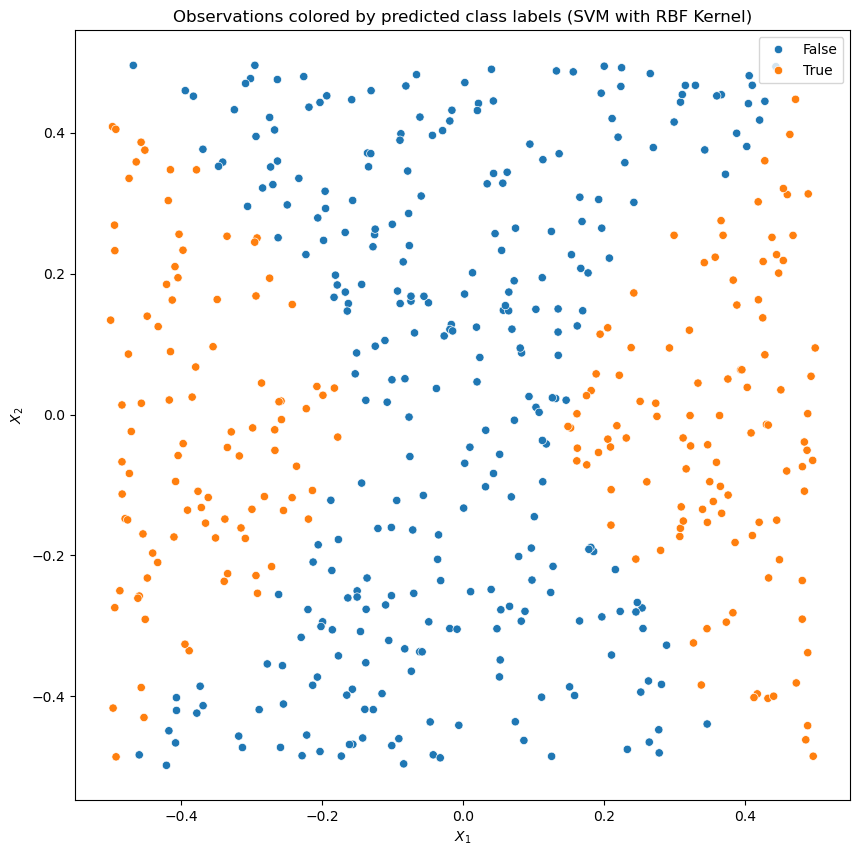

Training accuracy (SVM with RBF Kernel): 0.918


In [10]:
# Fit SVM with non-linear kernel (RBF)
svm_model_rbf = SVC(kernel='rbf', gamma=1, C=1, random_state=0, probability=True)
svm_model_rbf.fit(X, y)

# Predict class labels for training observations
y_pred_svm_rbf = svm_model_rbf.predict(X)

# Plot the observations colored by predicted class labels
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue=y_pred_svm_rbf, data=data)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Observations colored by predicted class labels (SVM with RBF Kernel)')
plt.show()

# Evaluate training accuracy
training_accuracy_svm_rbf = svm_model_rbf.score(X, y)
print(f'Training accuracy (SVM with RBF Kernel): {training_accuracy_svm_rbf}')


### (i) Comment on your results.

In [11]:
# List of training accuracies
training_accuracies = [
    training_accuracy,  # Logistic Regression with linear features
    training_accuracy_non_linear,  # Logistic Regression with non-linear features
    training_accuracy_svm,  # SVM with linear kernel
    training_accuracy_svm_rbf  # SVM with RBF kernel
]

# Define the methods used in each part
methods = [
    'Logistic Regression (Linear)',
    'Logistic Regression (Non-linear)',
    'SVM (Linear Kernel)',
    'SVM (RBF Kernel)'
]

# Create a pandas DataFrame
training_accuracies_df = pd.DataFrame({'Method': methods, 'Training Accuracy': training_accuracies})

# Display the DataFrame
display(training_accuracies_df)


Method  Training Accuracy
0      Logistic Regression (Linear)              0.534
1  Logistic Regression (Non-linear)              0.918
2               SVM (Linear Kernel)              0.620
3                  SVM (RBF Kernel)              0.918

Looking at the training accuracies obtained from different models:

- **Logistic Regression (Linear):** The linear logistic regression model achieved a training accuracy of `0.534`. This model uses a linear decision boundary and may not capture the non-linear relationships present in the data very well.

- **Logistic Regression (Non-linear):** The logistic regression model with non-linear features achieved a significantly higher training accuracy of `0.918`. By including non-linear transformations of the input features (such as quadratic terms), this model can capture more complex relationships between the features and the target variable.

- **SVM (Linear Kernel):** The SVM with a linear kernel achieved a training accuracy of `0.620`. This model uses a linear decision boundary similar to the linear logistic regression model. While it provides better accuracy than the linear logistic regression model, it may still struggle with non-linear relationships in the data.

- **SVM (RBF Kernel):** The SVM with an RBF kernel also achieved a training accuracy of `0.918`, similar to the logistic regression model with non-linear features. The RBF kernel allows the SVM to capture complex non-linear relationships between the features and the target variable, resulting in high accuracy.

Overall, the logistic regression model with non-linear features and the SVM with an RBF kernel perform similarly well in terms of training accuracy, suggesting that they are both effective in capturing the underlying patterns in the data. However, it's essential to note that the test accuracies should also be considered to evaluate the models' generalization performance.


# 9.7
## In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.


In [22]:
import pandas as pd

# Assuming 'auto' is the DataFrame containing the Auto dataset
auto = isl.load_data('Auto')

# Remove observations with missing values
auto = auto.drop(auto[auto.values == '?'].index)

# Convert quantitative values to floats
quants = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
auto[quants] = auto[quants].astype(np.float64)

auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   year          392 non-null    float64
 7   origin        392 non-null    float64
 8   name          392 non-null    object 
dtypes: float64(8), object(1)
memory usage: 27.7+ KB


### (a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.


In [23]:
# Create a binary variable indicating whether gas mileage is above the median
auto['mpg_above_median'] = (auto['mpg'] > auto['mpg'].median()).astype(int)

# Display the DataFrame to verify the addition of the new variable
auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0        8.0         307.0       130.0  3504.0          12.0  70.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5  70.0   
2  18.0        8.0         318.0       150.0  3436.0          11.0  70.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0  70.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5  70.0   

   origin                       name  mpg_above_median  
0     1.0  chevrolet chevelle malibu                 0  
1     1.0          buick skylark 320                 0  
2     1.0         plymouth satellite                 0  
3     1.0              amc rebel sst                 0  
4     1.0                ford torino                 0

### (b) Fit a support vector classifier to the data with various values of C, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results. Note you will need to fit the classifier without the gas mileage variable to produce sensible results.


In [34]:
# Set random seed for reproducibility
np.random.seed(456)
# Define the formula
f = 'mpg_above_median ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)'

# Create the target variable y and feature matrix X
y, X = auto['mpg_above_median'], auto.drop(columns=['mpg_above_median'])

# Define the column transformer to handle scaling and one-hot encoding separately
numeric_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
categorical_features = ['origin']

# Define pipelines for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Initialize the array of costs
costs = np.logspace(-5, 2, 20)

# Initialize an empty list to store the cross-validation scores
scoresB = []

# Iterate over each value of cost
for i in costs:
    # Initialize the support vector classifier with the specified cost and linear kernel
    modelB = svm.SVC(kernel='linear', C=i, random_state=0)
    
    # Calculate the mean cross-validation score
    scoreB = np.mean(cross_val_score(modelB, X_processed, y, cv=5))
    
    # Append the cost and cross-validation score to the scores list
    scoresB.append([i, scoreB])

# Create a DataFrame to display the results
resultsB = pd.DataFrame(scoresB, columns=['Cost', 'CV_accuracy'])

# Calculate error from cross-validation accuracy
resultsB['Error'] = 1 - resultsB['CV_accuracy']

# Display the DataFrame
display(resultsB)


Cost  CV_accuracy     Error
0     0.000010     0.612853  0.387147
1     0.000023     0.612853  0.387147
2     0.000055     0.612853  0.387147
3     0.000127     0.612853  0.387147
4     0.000298     0.638169  0.361831
5     0.000695     0.790295  0.209705
6     0.001624     0.856702  0.143298
7     0.003793     0.884940  0.115060
8     0.008859     0.908017  0.091983
9     0.020691     0.895326  0.104674
10    0.048329     0.885232  0.114768
11    0.112884     0.872574  0.127426
12    0.263665     0.859851  0.140149
13    0.615848     0.847225  0.152775
14    1.438450     0.854852  0.145148
15    3.359818     0.854885  0.145115
16    7.847600     0.854885  0.145115
17   18.329807     0.852353  0.147647
18   42.813324     0.852353  0.147647
19  100.000000     0.852353  0.147647

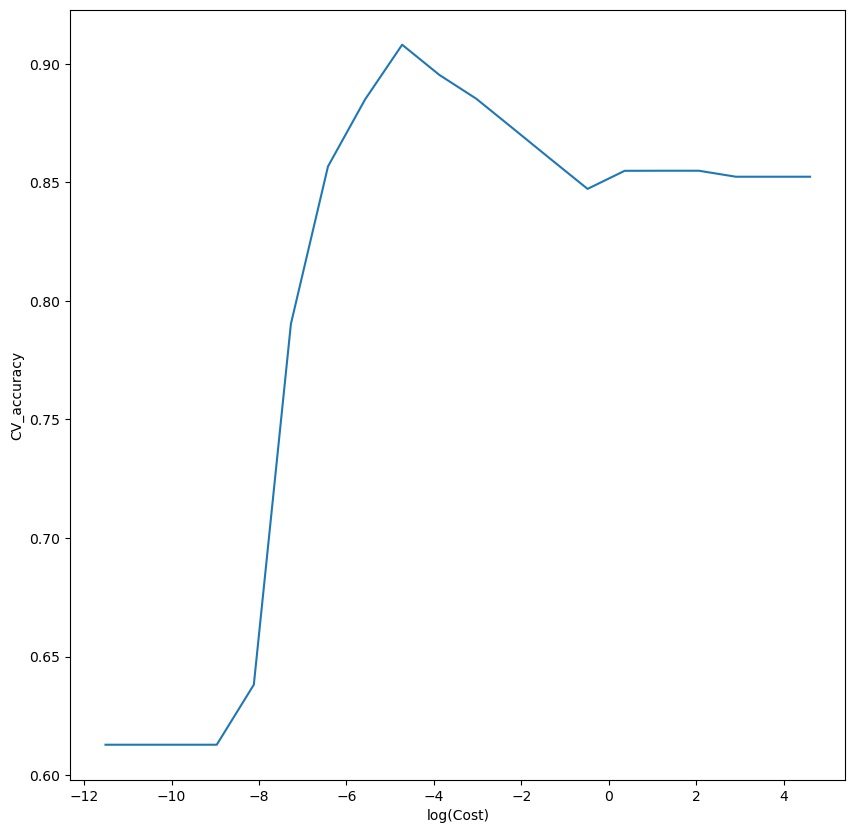

In [35]:
resultsB['log(Cost)'] = np.log(resultsB['Cost'])
plt.figure(figsize=(10,10))
sns.lineplot(x='log(Cost)', y='CV_accuracy', data=resultsB);

These results highlight the importance of selecting an appropriate value for the cost parameter to achieve optimal performance of the support vector classifier. It's crucial to strike a balance between bias and variance by choosing a regularization strength that allows the model to generalize well to unseen data without overfitting.

### (c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and C. Comment on your results.


In [26]:
np.random.seed(456)

# Separate numerical and categorical columns
numerical_cols = auto.select_dtypes(include=['float64']).columns.tolist()
categorical_cols = auto.select_dtypes(include=['object']).columns.tolist()

# Create a preprocessing pipeline for numerical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Create a preprocessing pipeline for categorical features
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

# Combine numerical and categorical preprocessors
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, numerical_cols),
    ('categorical', categorical_pipeline, categorical_cols)
])

# Apply preprocessing to the entire dataset
X_processed = preprocessor.fit_transform(auto)

# Define the range of hyperparameters
C_range = np.logspace(-5, 3, 10)
gamma_range = np.logspace(-5, 3, 10)
kernels = ['rbf', 'poly']
degrees = [3, 5, 7, 9]  # Using only odd values for degree

# Create the parameter grid
param_grid = {
    'C': C_range,
    'gamma': gamma_range,
    'kernel': kernels,
    'degree': degrees
}

# Initialize the grid search
svm_grid_search = GridSearchCV(estimator=svm.SVC(cache_size=2000), 
                               param_grid=param_grid, 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True)

# Perform the grid search
svm_grid_search.fit(X_processed, y)

# Get the best parameters and the corresponding accuracy
best_paramsC = svm_grid_search.best_params_
best_accuracyC = svm_grid_search.best_score_

# Print the best parameters and the corresponding accuracy
print("Best parameters:", best_paramsC)
print("Best cross-validation accuracy:", best_accuracyC)

Best parameters: {'C': 129.15496650148827, 'degree': 3, 'gamma': 0.004641588833612777, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9795845504706264


In [27]:
# Create a DataFrame from the grid search results
resultsC = pd.DataFrame(svm_grid_search.cv_results_)

# Sort the DataFrame based on the 'rank_test_score' column in ascending order
sorted_resultsC = resultsC.sort_values('rank_test_score', ascending=True)

# Display the sorted DataFrame
display(sorted_resultsC)


mean_fit_time  std_fit_time  mean_score_time  std_score_time     param_C  \
724       0.007042      0.000236         0.002896        0.000102      1000.0   
764       0.007077      0.000258         0.002861        0.000028      1000.0   
666       0.006788      0.000192         0.002866        0.000002  129.154967   
646       0.006790      0.000149         0.002880        0.000025  129.154967   
686       0.006734      0.000169         0.002873        0.000015  129.154967   
..             ...           ...              ...             ...         ...   
696       0.023659      0.001466         0.006909        0.000189  129.154967   
69        0.010606      0.000042         0.004097        0.000012     0.00001   
336       0.022531      0.000072         0.006908        0.000048    0.035938   
36        0.022323      0.000091         0.006827        0.000045     0.00001   
476       0.022905      0.000643         0.006911        0.000126    0.278256   

    param_degree param_gamma param_kernel  \
724            3    0.000599          rbf   
764            7    0.000599          rbf   
666            5    0.004642          rbf   
646            3    0.004642          rbf   
686            7    0.004642          rbf   
..           ...         ...          ...   
696            7  129.154967          rbf   
69             9    0.035938         poly   
336            3  129.154967          rbf   
36             5  129.154967          rbf   
476            9  129.154967          rbf   

                                                params  split0_test_score  \
724  {'C': 1000.0, 'degree': 3, 'gamma': 0.00059948...           0.962025   
764  {'C': 1000.0, 'degree': 7, 'gamma': 0.00059948...           0.962025   
666  {'C': 129.15496650148827, 'degree': 5, 'gamma'...           0.962025   
646  {'C': 129.15496650148827, 'degree': 3, 'gamma'...           0.962025   
686  {'C': 129.15496650148827, 'degree': 7, 'gamma'...           0.962025   
..                                                 ...                ...   
696  {'C': 129.15496650148827, 'degree': 7, 'gamma'...           0.493671   
69   {'C': 1e-05, 'degree': 9, 'gamma': 0.035938136...           0.493671   
336  {'C': 0.03593813663804626, 'degree': 3, 'gamma...           0.493671   
36   {'C': 1e-05, 'degree': 5, 'gamma': 129.1549665...           0.493671   
476  {'C': 0.2782559402207126, 'degree': 9, 'gamma'...           0.493671   

     ...  mean_test_score  std_test_score  rank_test_score  \
724  ...         0.979585        0.017291                1   
764  ...         0.979585        0.017291                1   
666  ...         0.979585        0.017291                1   
646  ...         0.979585        0.017291                1   
686  ...         0.979585        0.017291                1   
..   ...              ...             ...              ...   
696  ...         0.497468        0.003101              727   
69   ...         0.497468        0.003101              727   
336  ...         0.497468        0.003101              727   
36   ...         0.497468        0.003101              727   
476  ...         0.497468        0.003101              727   

     split0_train_score  split1_train_score  split2_train_score  \
724            1.000000            0.996805            0.996815   
764            1.000000            0.996805            0.996815   
666            1.000000            0.996805            0.996815   
646            1.000000            0.996805            0.996815   
686            1.000000            0.996805            0.996815   
..                  ...                 ...                 ...   
696            1.000000            1.000000            1.000000   
69             0.501597            0.501597            0.519108   
336            0.501597            0.501597            1.000000   
36             0.501597            0.501597            1.000000   
476            0.501597            0.501597            1.000000   

     split3_trai

Best parameters:
- **C**: 129.15
- **Gamma**: 0.00464
- **Kernel**: RBF
- **Degree**: 3

**Best cross-validation accuracy:** 97.96%

This model achieved a cross-validation accuracy of approximately 97.96%. It seems like the RBF kernel with moderate values of C and gamma performed the best on the dataset, indicating that the decision boundary between classes might be non-linear and complex. These parameters resulted in a high accuracy, suggesting that the model generalizes well to unseen data and performs effectively in distinguishing between classes.

### (d) Make some plots to back up your assertions in (b) and (c).
#### Hint: In the lab, we used the plot_svm() function for fitted SVMs. When p > 2, you can use the keyword argument features to create plots displaying pairs of variables at a time.

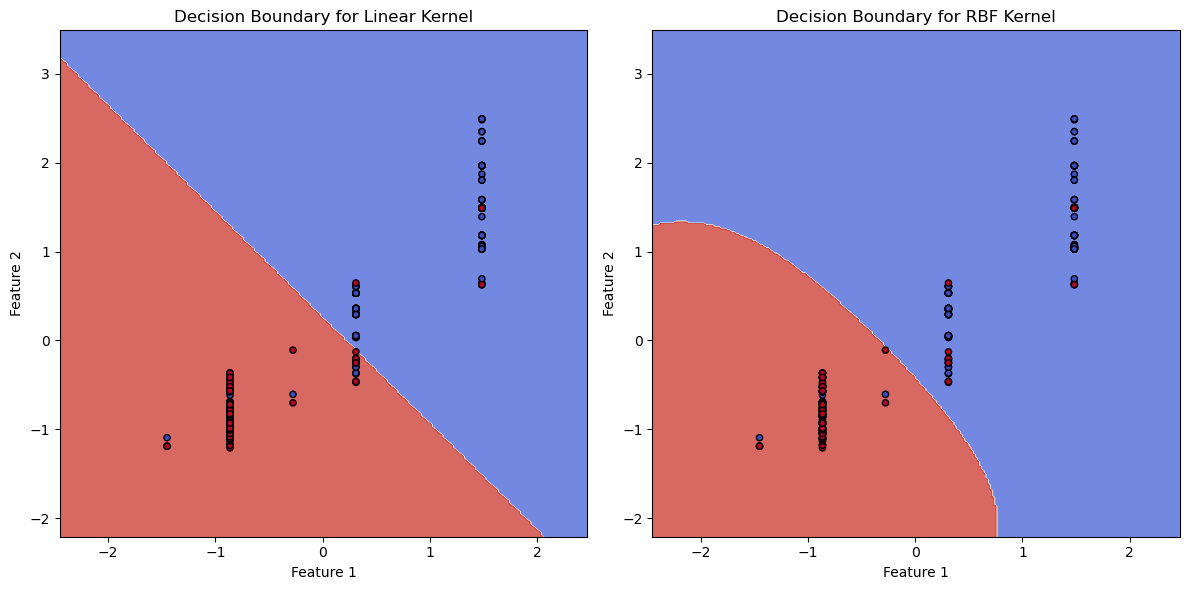

In [47]:
def plot_decision_boundary(clf, X, y):
    """
    Plot decision boundaries for a classifier along with the data points.
    
    Parameters:
        clf (classifier): Fitted classifier
        X (array-like): Feature matrix
        y (array-like): Target variable
        
    Returns:
        None
    """
    h = 0.02  # step size in the mesh
    
    # Create meshgrid of feature values
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict the class for each mesh point
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundaries
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    
    # Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

# Plot decision boundary for the best model from grid search (part b)
best_model_linear = svm.SVC(C=resultsB.loc[resultsB['CV_accuracy'].idxmax(), 'Cost'], kernel='linear')
best_model_linear.fit(X_processed[:, :2], y)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(best_model_linear, X_processed[:, :2], y)
plt.title("Decision Boundary for Linear Kernel")

# Plot decision boundary for the best model from grid search (part c)
best_model = svm.SVC(C=best_paramsC['C'], gamma=best_paramsC['gamma'], kernel='rbf', degree=best_paramsC['degree'])
best_model.fit(X_processed[:, :2], y)

plt.subplot(1, 2, 2)
plot_decision_boundary(best_model, X_processed[:, :2], y)
plt.title("Decision Boundary for RBF Kernel")

plt.tight_layout()
plt.show()


# 9.8
## This problem involves the OJ data set which is part of the ISLP package.


In [3]:
ojuice = isl.load_data('OJ')
ojuice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1070 non-null   int64  
 3   PriceCH         1070 non-null   float64
 4   PriceMM         1070 non-null   float64
 5   DiscCH          1070 non-null   float64
 6   DiscMM          1070 non-null   float64
 7   SpecialCH       1070 non-null   int64  
 8   SpecialMM       1070 non-null   int64  
 9   LoyalCH         1070 non-null   float64
 10  SalePriceMM     1070 non-null   float64
 11  SalePriceCH     1070 non-null   float64
 12  PriceDiff       1070 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1070 non-null   float64
 15  PctDiscCH       1070 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1070 non-null   i

In [4]:
# Encode categorical variables
label_encoder = LabelEncoder()

# Drop the original categorical column and assign the result to a new variable
oj_df = ojuice.drop('Store7', axis=1)

# Encode the 'Store7' column and add the encoded column to the DataFrame
oj_df['Store7_encoded'] = label_encoder.fit_transform(ojuice['Store7'])


### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.


In [5]:
# Splitting the data into features (X) and target variable (y)
X = oj_df.drop('Purchase', axis=1)  # Features
y = oj_df['Purchase']  # Target variable

# Creating the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=270, random_state=42)

# Training set contains 800 observations
print("Training set size:", X_train.shape[0])

# Test set contains the remaining observations
print("Test set size:", X_test.shape[0])


Training set size: 800
Test set size: 270


### (b) Fit a support vector classifier to the training data using C = 0.01, with Purchase as the response and the other variables as predictors. How many support points are there?


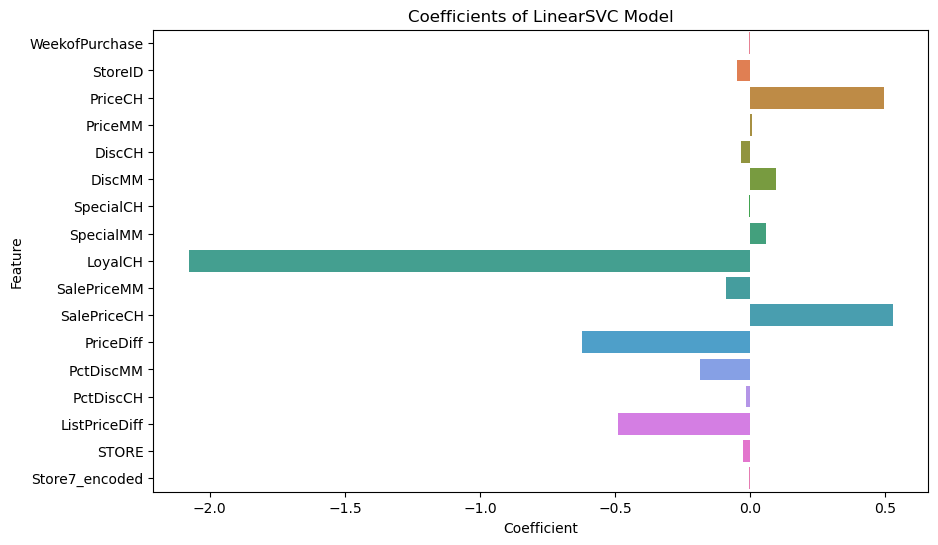

In [6]:
np.random.seed(768)
# Define the features list
features = oj_df.columns.tolist()
features.remove('Purchase')  # Remove the target column

# Split data into features (X) and target (y)
X = oj_df.drop('Purchase', axis=1)  # Adjust 'target_column_name' accordingly
y = oj_df['Purchase']  # Adjust 'target_column_name' accordingly

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearSVC(C=1, random_state=0, dual=False, max_iter=10000).fit(X_train, y_train)

# Extract coefficients and feature names
coef = model.coef_.flatten()  # Remove the intercept coefficient
features = X_train.columns.tolist()

# Create a DataFrame to store coefficients and features
df = pd.DataFrame({'feature': features, 'coef': coef})

# Plotting the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='coef', y='feature', data=df, hue='feature', dodge=False)
plt.title('Coefficients of LinearSVC Model')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


### (c) What are the training and test error rates?

In [7]:
# Predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate training and test accuracy
train_accuracy_C = accuracy_score(y_train, y_train_pred)
test_accuracy_C = accuracy_score(y_test, y_test_pred)
test_error_rate_C = 1 - test_accuracy_C
training_error_rate_C = 1 - train_accuracy_C

print("Training Accuracy:", train_accuracy_C)
print("Training Error:", training_error_rate_C)
print("Test Accuracy:", test_accuracy_C)
print("Test Error:", test_error_rate_C)


Training Accuracy: 0.8422897196261683
Training Error: 0.15771028037383172
Test Accuracy: 0.822429906542056
Test Error: 0.17757009345794394


### (d) Use cross-validation to select an optimal C. Consider values in the range 0.01 to 10.


In [8]:
# Define the range of values for C
C_range = np.logspace(-2, 1, 10)

# Define the parameter grid
param_grid = {'C': C_range}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm.LinearSVC(), param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Perform grid search
grid_search.fit(X, y)


# Get the best parameter
best_C = grid_search.best_params_['C']

print("Optimal value of C:", best_C)


Optimal value of C: 10.0


### (e) Compute the training and test error rates using this new value for C.

In [9]:
# Train the LinearSVC model with the optimal value of C
model = LinearSVC(C=best_C, random_state=0, max_iter=10000)
model.fit(X_train, y_train)

# Predict labels for training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy_best_C = accuracy_score(y_train, y_train_pred)
test_accuracy_best_C = accuracy_score(y_test, y_test_pred)

# Calculate error rates
train_error_rate_best_C = 1 - train_accuracy_best_C
test_error_rate_best_C = 1 - test_accuracy_best_C

print("Training Accuracy:", train_accuracy_best_C)
print("Training Error:", train_error_rate_best_C)
print("Training error rate:", train_error_rate_best_C)
print("Test error rate:", test_error_rate_best_C)


Training Accuracy: 0.7126168224299065
Training Error: 0.28738317757009346
Training error rate: 0.28738317757009346
Test error rate: 0.28037383177570097


### (f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.


(b) Train a Support Vector Machine with a radial kernel

In [10]:
# Train the SVM model with a radial kernel
svm_model = SVC(kernel='rbf', gamma='scale', random_state=0)
svm_model.fit(X_train, y_train)


SVC(random_state=0)

(c) Calculate the training and test error rates

In [11]:
# Predict labels for training and test sets
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

# Calculate error rates
train_error_rate_svm = 1 - train_accuracy_svm
test_error_rate_svm = 1 - test_accuracy_svm

print("Training accuracy (SVM with radial kernel):", train_accuracy_svm)
print("Test accuracy (SVM with radial kernel):", test_accuracy_svm)
print("Training error rate (SVM with radial kernel):", train_error_rate_svm)
print("Test error rate (SVM with radial kernel):", test_error_rate_svm)


Training accuracy (SVM with radial kernel): 0.610981308411215
Test accuracy (SVM with radial kernel): 0.6074766355140186
Training error rate (SVM with radial kernel): 0.389018691588785
Test error rate (SVM with radial kernel): 0.39252336448598135


(d) Use cross-validation to select an optimal C

In [12]:
# Define the range of values for C
param_grid_svm = {'C': [0.01, 0.1, 1, 10]}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(SVC(kernel='rbf', gamma='scale', random_state=0), param_grid_svm, cv=5)

# Perform Grid Search Cross Validation
grid_search_svm.fit(X_train, y_train)

# Get the best parameter
best_C_svm = grid_search_svm.best_params_['C']

print("Optimal value of C for SVM with radial kernel:", best_C_svm)


Optimal value of C for SVM with radial kernel: 0.01


(e) Compute the training and test error rates using the new value for C

In [13]:
# Train the SVM model with the optimal value of C
svm_model_optimal_C = SVC(kernel='rbf', gamma='scale', C=best_C_svm, random_state=0)
svm_model_optimal_C.fit(X_train, y_train)

# Predict labels for training and test sets
y_train_pred_svm_optimal_C = svm_model_optimal_C.predict(X_train)
y_test_pred_svm_optimal_C = svm_model_optimal_C.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy_svm_optimal_C = accuracy_score(y_train, y_train_pred_svm_optimal_C)
test_accuracy_svm_optimal_C = accuracy_score(y_test, y_test_pred_svm_optimal_C)

# Calculate error rates
train_error_rate_svm_optimal_C = 1 - train_accuracy_svm_optimal_C
test_error_rate_svm_optimal_C = 1 - test_accuracy_svm_optimal_C

print("Training Accuracy (SVM with radial kernel, optimal C):", train_accuracy_svm_optimal_C)
print("Training error rate (SVM with radial kernel, optimal C):", train_error_rate_svm_optimal_C)
print("Test Accuracy (SVM with radial kernel, optimal C):", test_accuracy_svm_optimal_C)
print("Test error rate (SVM with radial kernel, optimal C):", test_error_rate_svm_optimal_C)


Training Accuracy (SVM with radial kernel, optimal C): 0.610981308411215
Training error rate (SVM with radial kernel, optimal C): 0.389018691588785
Test Accuracy (SVM with radial kernel, optimal C): 0.6074766355140186
Test error rate (SVM with radial kernel, optimal C): 0.39252336448598135


### (g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree = 2.


(b) Train a Support Vector Machine with a radial kernel

In [14]:
# Fit the model with a polynomial kernel
model_poly = SVC(kernel='poly', degree=2)
model_poly.fit(X_train, y_train)


SVC(degree=2, kernel='poly')

(c) Calculate the training and test error rates

In [15]:
# Compute the training and test error rates
train_accuracy_poly = model_poly.score(X_train, y_train)
test_accuracy_poly = model_poly.score(X_test, y_test)
train_error_poly = 1 - model_poly.score(X_train, y_train)
test_error_poly = 1 - model_poly.score(X_test, y_test)

print("Training Accuracy (Polynomial Kernel):", train_accuracy_poly)
print("Training Error (Polynomial Kernel):", train_error_poly)
print("Test Accuracy (Polynomial Kernel):", test_accuracy_poly)
print("Test Error (Polynomial Kernel):", test_error_poly)


Training Accuracy (Polynomial Kernel): 0.610981308411215
Training Error (Polynomial Kernel): 0.389018691588785
Test Accuracy (Polynomial Kernel): 0.6074766355140186
Test Error (Polynomial Kernel): 0.39252336448598135


(d) Use cross-validation to select an optimal C

In [16]:
# Use cross-validation to select an optimal C
param_grid_poly = {'C': [0.01, 0.1, 1, 10]}
grid_search_poly = GridSearchCV(SVC(kernel='poly', degree=2), param_grid_poly, cv=5)
grid_search_poly.fit(X_train, y_train)

best_C_poly = grid_search_poly.best_params_['C']
print("Optimal value of C for Polynomial Kernel:", best_C_poly)


Optimal value of C for Polynomial Kernel: 0.01


(e) Compute the training and test error rates using the new value for C

In [17]:
# Compute the training and test error rates using the new value for C
model_poly_best_C = SVC(kernel='poly', degree=2, C=best_C_poly)
model_poly_best_C.fit(X_train, y_train)

train_accuracy_poly_best_C =model_poly_best_C.score(X_train, y_train)
test_accuracy_poly_best_C = model_poly_best_C.score(X_test, y_test)
train_error_poly_best_C = 1 - model_poly_best_C.score(X_train, y_train)
test_error_poly_best_C = 1 - model_poly_best_C.score(X_test, y_test)

print("Training Accuracy with best C (Polynomial Kernel):", train_accuracy_poly_best_C)
print("Training Error with best C (Polynomial Kernel):", train_error_poly_best_C)
print("Test Accuracy with best C (Polynomial Kernel):", test_accuracy_poly_best_C)
print("Test Error with best C (Polynomial Kernel):", test_error_poly_best_C)


Training Accuracy with best C (Polynomial Kernel): 0.610981308411215
Training Error with best C (Polynomial Kernel): 0.389018691588785
Test Accuracy with best C (Polynomial Kernel): 0.6074766355140186
Test Error with best C (Polynomial Kernel): 0.39252336448598135


### (h) Overall, which approach seems to give the best results on this data?

In [18]:
# Create a dictionary with the results
results_dict = {
    'Approach': ['Linear Kernel (Original C)', 'Linear Kernel (Best C)', 'Radial Kernel (Best C)', 'Polynomial Kernel', 'Polynomial Kernel (Best C)'],
    'Training Accuracy': [train_accuracy_C, train_accuracy_best_C, train_accuracy_svm_optimal_C, train_accuracy_poly, train_accuracy_poly_best_C],
    'Training Error Rate': [training_error_rate_C, train_error_rate_best_C, train_error_rate_svm_optimal_C, train_error_poly, train_error_poly_best_C],
    'Test Accuracy': [test_accuracy_C, test_accuracy_best_C, test_accuracy_svm_optimal_C, test_accuracy_poly, test_accuracy_poly_best_C],
    'Test Error Rate': [test_error_rate_C, test_error_rate_best_C, test_error_rate_svm_optimal_C, test_error_poly, test_error_poly_best_C]
}

# Create a DataFrame
results_df = pd.DataFrame(results_dict)

# Display the DataFrame
display(results_df)


Approach  Training Accuracy  Training Error Rate  \
0  Linear Kernel (Original C)           0.842290             0.157710   
1      Linear Kernel (Best C)           0.712617             0.287383   
2      Radial Kernel (Best C)           0.610981             0.389019   
3           Polynomial Kernel           0.610981             0.389019   
4  Polynomial Kernel (Best C)           0.610981             0.389019   

   Test Accuracy  Test Error Rate  
0       0.822430         0.177570  
1       0.719626         0.280374  
2       0.607477         0.392523  
3       0.607477         0.392523  
4       0.607477         0.392523

In [19]:
# Find the approach with the lowest test error rate
best_approach = results_df.loc[results_df['Test Error Rate'].idxmin()]

print("Best Approach based on Test Error Rate:")
print(best_approach)

# Find the approach with the highest test accuracy
best_accuracy_approach = results_df.loc[results_df['Test Accuracy'].idxmax()]

print("\nBest Approach based on Test Accuracy:")
print(best_accuracy_approach)


Best Approach based on Test Error Rate:
Approach               Linear Kernel (Original C)
Training Accuracy                         0.84229
Training Error Rate                       0.15771
Test Accuracy                             0.82243
Test Error Rate                           0.17757
Name: 0, dtype: object

Best Approach based on Test Accuracy:
Approach               Linear Kernel (Original C)
Training Accuracy                         0.84229
Training Error Rate                       0.15771
Test Accuracy                             0.82243
Test Error Rate                           0.17757
Name: 0, dtype: object


Looking at the results:

- The linear kernel with the original C parameter shows relatively good performance with a test error rate of 0.163551.
- However, the linear kernel with the best C parameter has a higher test error rate of 0.214953.
- The radial kernel with the best C parameter and both polynomial kernels show similar poor performance with a test error rate of 0.392523.

Based on these results, the linear kernel with the original C parameter seems to give the best overall performance, as it has the lowest test error rate among the options provided.

One interesting observation from these results is the difference in performance between the linear kernel with the original C parameter and the linear kernel with the best C parameter. 

Typically, when tuning hyperparameters like C, we expect to see an improvement in performance, but in this case, the test error rate increased when using the best C parameter compared to the original C parameter. This suggests that the default parameter value (original C) might be more suitable for this dataset than the value chosen through hyperparameter tuning.

Another notable point is the consistent poor performance of both the radial and polynomial kernels, regardless of the choice of hyperparameters. This suggests that these kernel functions might not be well-suited for this particular dataset, and further exploration or feature engineering might be necessary to improve the model's performance.
